# Project : Model Selection.

Pradeep Kumar Singh  
24/05/2023

## Tools used : 
Python libraries.

## Project details : 
This project is about Model Selection for car price prediction.

**Steps involved**
* Data Preprocessing.
* Feature Selection and Engineering.
* Machine Learning Model Application.
* Training Evaluation and Model Selection.

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

C:\Users\Abc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('C:/Users/Abc/Downloads/car_price/car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#### Encoding the Categorical Data

In [8]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Splitting the data and Target

In [10]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#### Splitting Training and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

#### Model Training

##### 1. Linear Regression

In [14]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#### Model Evaluation on Training Data

In [16]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.87994516604937


#### Visualize the actual prices and Predicted prices based on Training Data.

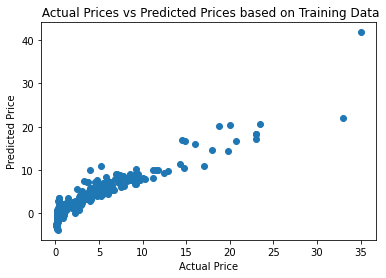

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices based on Training Data")
plt.show()

#### Model Evaluation on Test Data

In [19]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R squared Error
er_scores=[]
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
er_scores.append(f"linear regression : {error_score}")

R squared Error :  0.8365766715026828


#### Visualize the actual prices and Predicted prices based on Test Data

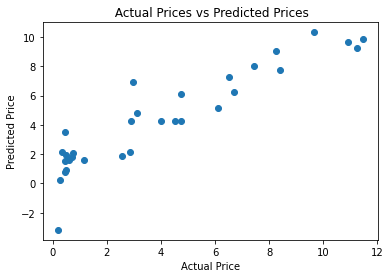

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##### 2. Lasso Regression

In [22]:
# loading the linear regression model
lass_reg_model = Lasso()

In [23]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

#### Model Evaluation on Training Data

In [24]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


#### Visualize the actual prices and Predicted prices based on Training Data.

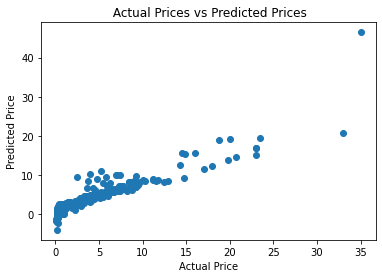

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Model Evaluation on Test Data

In [27]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
er_scores.append(f"lasso regression : {error_score}")

R squared Error :  0.8709167941173195


#### Visualize the actual prices and Predicted prices based on Test Data

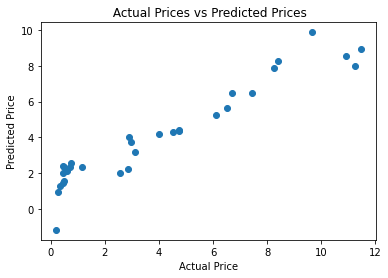

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##### 3. Decision Tree Regressor

In [30]:
# Loading the Decision Tree Regressor model
dtr = DecisionTreeRegressor()

In [31]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

#### Model Evaluation on Training Data

In [32]:
# prediction on Training data
training_data_prediction = dtr.predict(X_train)

In [33]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


#### Visualize the actual prices and Predicted prices based on Training Data.

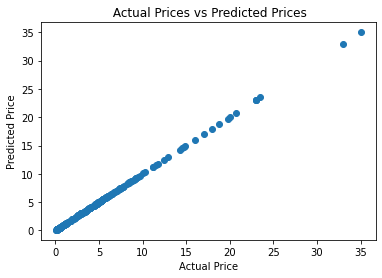

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Model Evaluation on Test Data

In [35]:
# prediction on Test data
test_data_prediction = dtr.predict(X_test)

In [36]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
er_scores.append(f"Decision tree regressor : {error_score}")

R squared Error :  0.9428246604920691


#### Visualize the actual prices and Predicted prices based on Test Data

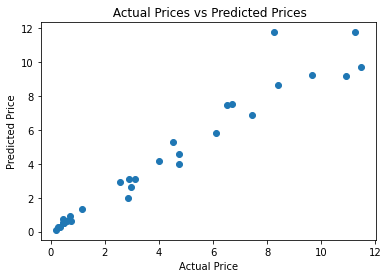

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##### 4. Random forest regressor. 

In [38]:
# Loading the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators = 100, random_state = 20)

In [39]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=20)

#### Model Evaluation on Training Data

In [40]:
# prediction on Training data
training_data_prediction = rf.predict(X_train)

In [41]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9847476124194515


#### Visualize the actual prices and Predicted prices based on Training Data.

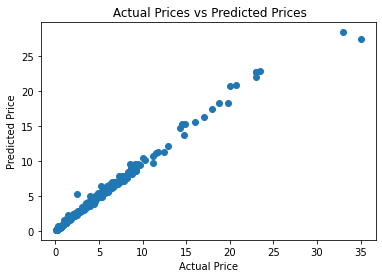

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Model Evaluation on Test Data

In [43]:
# prediction on Test data
test_data_prediction = rf.predict(X_test)


In [44]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
er_scores.append(f"Random forest : {error_score}")

R squared Error :  0.9812982183777309


#### Visualize the actual prices and Predicted prices based on Test Data.

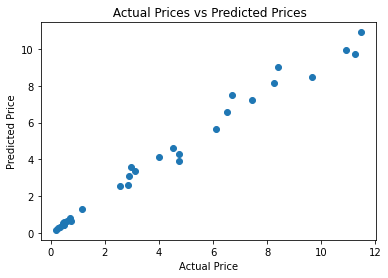

In [45]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##### 5. Ridge regressor

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
rg_rs.fit(X_train,Y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])})

#### Model Evaluation on Training Data

In [47]:
# prediction on Training data
training_data_prediction = rg_rs.predict(X_train)

In [48]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799340219756571


#### Visualize the actual prices and Predicted prices based on Training Data.

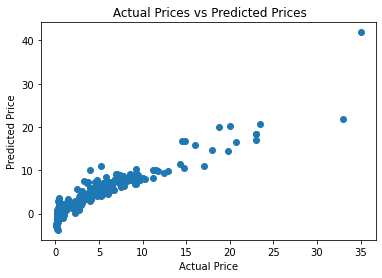

In [49]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Model Evaluation based on Test Data

In [50]:
# prediction on Test data
test_data_prediction = rg_rs.predict(X_test)

In [51]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
er_scores.append(f"Ridge regressor : {error_score}")

R squared Error :  0.838694728242787


#### Visualize the actual prices and Predicted prices based on Test Data.

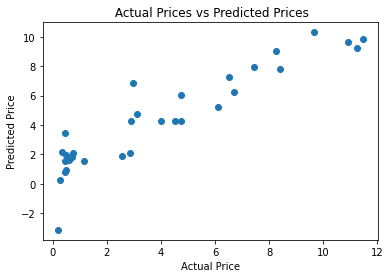

In [52]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Comparing R squared Error for all five ML models based on Test data.

In [53]:
for i in er_scores:
    print(i)

linear regression : 0.8365766715026828
lasso regression : 0.8709167941173195
Decision tree regressor : 0.9428246604920691
Random forest : 0.9812982183777309
Ridge regressor : 0.838694728242787


#### Random forest regressor seems to be the best model as per the R squared Error based on test data prediction, with R2 score of 98%.